# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [16]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

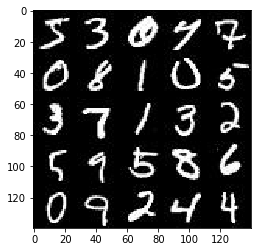

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

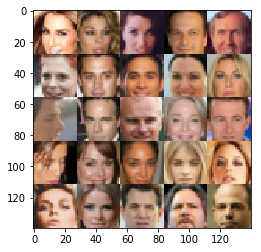

In [18]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [20]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='images')
    z = tf.placeholder(tf.float32,(None, z_dim), name='z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return images, z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "C:\\Users\\bryan\\AppData\\Local\\conda\\conda\\envs\\tensorflow\\lib\\runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "C:\\Users\\bryan\\AppData\\Local\\conda\\conda\\envs\\tensorflow\\lib\\runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "C:\\Users\\bryan\\AppData\\Local\\conda\\conda\\envs\\tensorflow\\lib\\site-packages\\ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "C:\\Users\\bryan\\AppData\\Local\\conda\\conda\\envs\\tensorflow\\lib\\site-packages\\traitlets\\config\\application.py", line 658, in launch_instance\n    app.start()', 'File "C:\\Users\\bryan\\AppData\\Local\\conda\\conda\\envs\\tensorflow\\

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [21]:

def discriminator(images, reuse=False, alpha = 0.0):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        #input 28x28x3
        layer_1 = tf.layers.conv2d(images,64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
        
        #input 14x14x64
        layer_2 = tf.layers.conv2d(layer_1,128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        layer_2 = tf.layers.batch_normalization(layer_2, training=True)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        
        #input 7x7x128
        layer_3 = tf.layers.conv2d(layer_2,256, 3, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        layer_3 = tf.layers.batch_normalization(layer_3, training=True)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
        #input 4x4x256
        
        layer_4 = tf.layers.conv2d(layer_3,512, 2, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        layer_4 = tf.layers.batch_normalization(layer_4, training=True)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
        layer_5 = tf.reshape(layer_4,(-1, 2*2*512))
        
        
        #input 4096
        logits =  tf.layers.dense(layer_5, 1)
        out = tf.sigmoid(logits)
        
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [22]:

import problem_unittests as tests
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    with tf.variable_scope('generator',reuse=not is_train):
        size =4*4*512
        layer_1 = tf.layers.dense(z, size, activation=None)
        layer_1 = tf.reshape(layer_1, (-1, 4, 4, 512))
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
        
        #input  4x4x512
        layer_2 = tf.layers.conv2d_transpose(layer_1,128, 4, strides=1, padding='valid')
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
        
        #input 8x8x128
        layer_3 = tf.layers.conv2d_transpose(layer_2,64, 5, strides=2, padding='same')
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
        
        layer_4 = tf.layers.conv2d_transpose(layer_3, 32, 5, strides=2, padding='same')
        layer_4 = tf.layers.batch_normalization(layer_4, training=is_train)
        layer_4 = tf.maximum(alpha * layer_4, layer_4)
        
        #input 16x16x64
        logits= tf.layers.conv2d_transpose(layer_4, out_channel_dim,3, strides=1, padding='same')
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [24]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1.0-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [25]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [26]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, is_train=False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [28]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    images, z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    print(data_shape)
    d_loss, g_loss = model_loss(images, z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for i, batch_images in enumerate(get_batches(batch_size)):
                
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # TODO: Train Model
                _, d_loss_value = sess.run([d_train_opt, d_loss], feed_dict={images: batch_images, z: batch_z, lr: learning_rate })
                _, d_loss_value = sess.run([d_train_opt, d_loss], feed_dict={images: batch_images, z: batch_z, lr: learning_rate })
                
                _, g_loss_value = sess.run([g_train_opt, g_loss],feed_dict={z: batch_z, images: batch_images, lr: learning_rate})
                _, g_loss_value = sess.run([g_train_opt, g_loss],feed_dict={z: batch_z, images: batch_images, lr: learning_rate})
                _, g_loss_value = sess.run([g_train_opt, g_loss],feed_dict={z: batch_z, images: batch_images, lr: learning_rate})
                
                if i % 100 == 0:
                    print("Discriminator Loss: {} \nGenerator Loss: {}".format(d_loss_value, g_loss_value))
                    show_generator_output(sess, 9, z, data_shape[3], data_image_mode)
            
            print("After Epoch {}".format(epoch_i))
            print("Discriminator Loss: {} \nGenerator Loss: {}".format(d_loss_value, g_loss_value))
            show_generator_output(sess, 25, z, data_shape[3], data_image_mode)
    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
Discriminator Loss: 1.0621429681777954 
Generator Loss: 9.03968611964956e-06


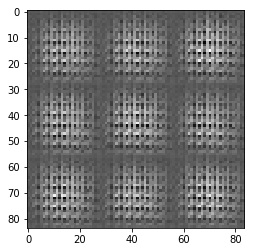

Discriminator Loss: 1.1447465419769287 
Generator Loss: 0.4789184033870697


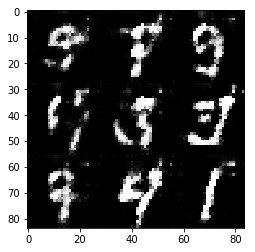

Discriminator Loss: 1.062640905380249 
Generator Loss: 0.46670961380004883


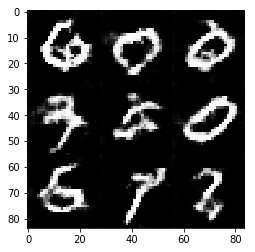

Discriminator Loss: 0.8906642198562622 
Generator Loss: 0.4679357409477234


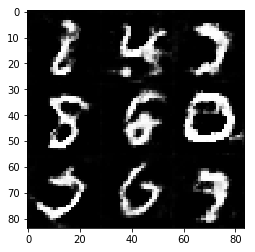

Discriminator Loss: 0.8151711821556091 
Generator Loss: 0.3377084732055664


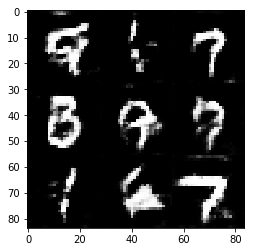

Discriminator Loss: 0.6349043846130371 
Generator Loss: 0.4636470079421997


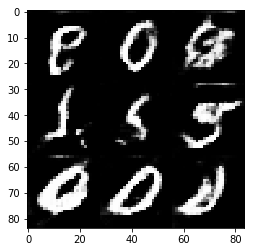

Discriminator Loss: 0.6924747824668884 
Generator Loss: 0.3301852345466614


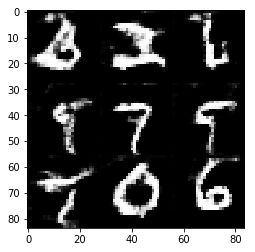

Discriminator Loss: 0.8022252917289734 
Generator Loss: 0.21680030226707458


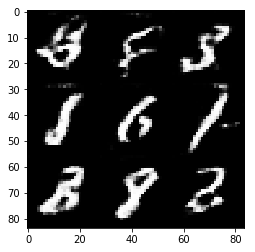

Discriminator Loss: 0.6246517896652222 
Generator Loss: 0.5167829990386963


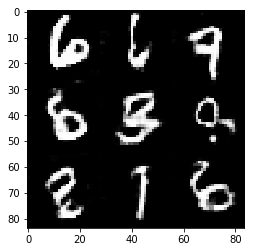

Discriminator Loss: 0.5247523188591003 
Generator Loss: 0.2190452367067337


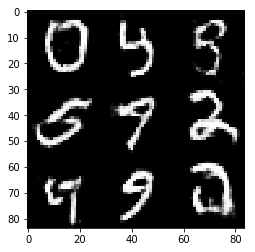

Discriminator Loss: 0.5311810970306396 
Generator Loss: 0.25419485569000244


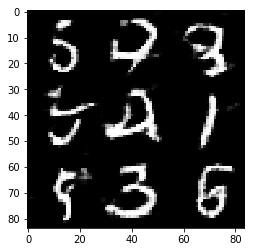

Discriminator Loss: 0.5109086632728577 
Generator Loss: 0.6388165950775146


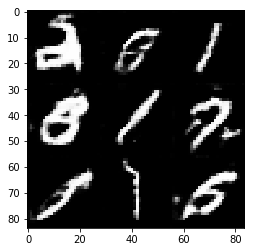

Discriminator Loss: 0.42442598938941956 
Generator Loss: 0.194492906332016


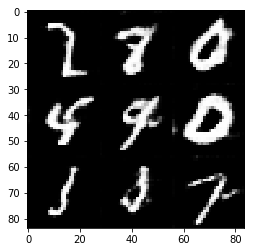

Discriminator Loss: 0.5125640630722046 
Generator Loss: 0.21091124415397644


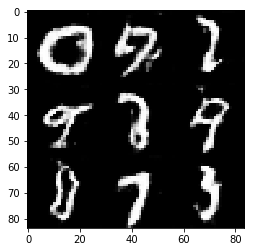

Discriminator Loss: 0.44165199995040894 
Generator Loss: 0.20537643134593964


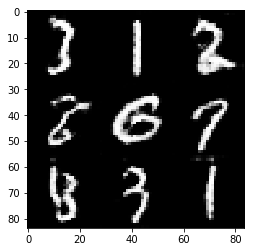

Discriminator Loss: 0.4935014247894287 
Generator Loss: 0.2616986036300659


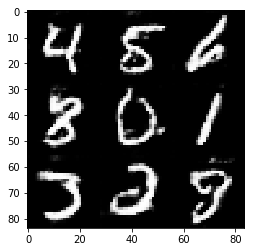

Discriminator Loss: 0.4310151934623718 
Generator Loss: 0.4059578776359558


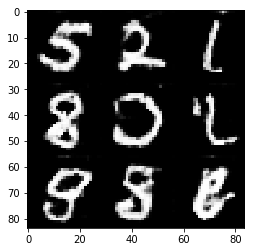

Discriminator Loss: 0.5303968191146851 
Generator Loss: 0.34504687786102295


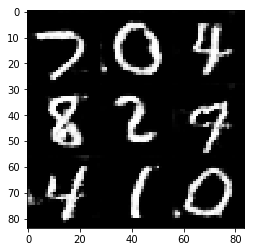

Discriminator Loss: 0.8063268661499023 
Generator Loss: 0.21885442733764648


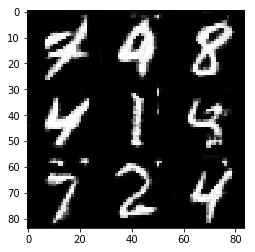

After Epoch 0
Discriminator Loss: 0.39685672521591187 
Generator Loss: 0.18138933181762695


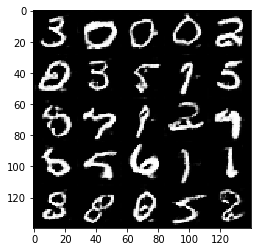

Discriminator Loss: 0.5550885200500488 
Generator Loss: 0.44540464878082275


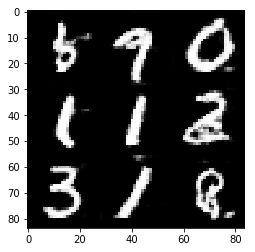

Discriminator Loss: 0.4389635920524597 
Generator Loss: 0.2559410333633423


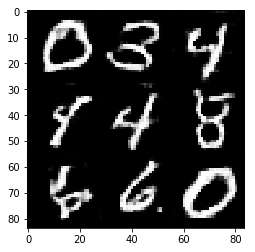

Discriminator Loss: 0.42799028754234314 
Generator Loss: 0.38502150774002075


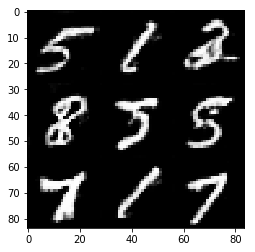

Discriminator Loss: 0.5112703442573547 
Generator Loss: 0.3176018297672272


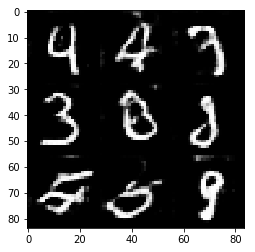

Discriminator Loss: 0.4043772220611572 
Generator Loss: 0.18810348212718964


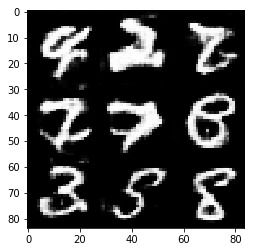

Discriminator Loss: 0.37702441215515137 
Generator Loss: 0.2220698744058609


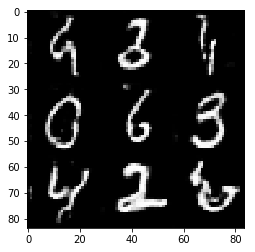

Discriminator Loss: 0.4265457093715668 
Generator Loss: 0.35575926303863525


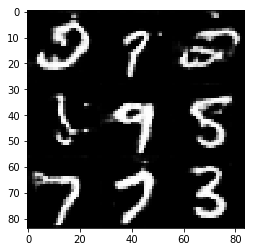

Discriminator Loss: 1.2810598611831665 
Generator Loss: 0.39964359998703003


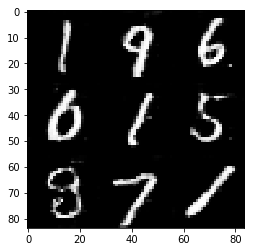

Discriminator Loss: 0.464594304561615 
Generator Loss: 0.31072425842285156


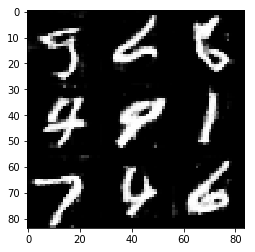

Discriminator Loss: 0.882644534111023 
Generator Loss: 0.12631890177726746


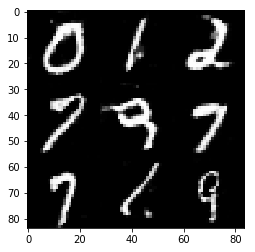

Discriminator Loss: 0.4868050813674927 
Generator Loss: 0.5037025213241577


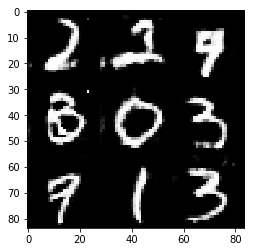

Discriminator Loss: 0.4315027594566345 
Generator Loss: 0.26679325103759766


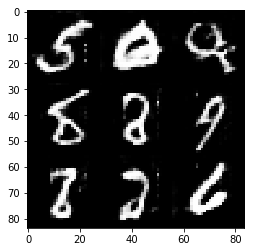

Discriminator Loss: 0.35935935378074646 
Generator Loss: 0.21929211914539337


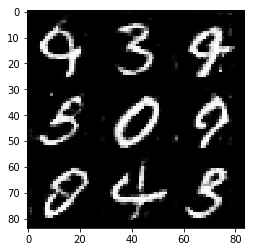

Discriminator Loss: 0.8536819815635681 
Generator Loss: 1.3404197692871094


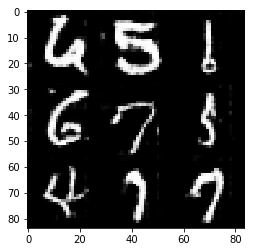

Discriminator Loss: 0.7405431866645813 
Generator Loss: 0.29741448163986206


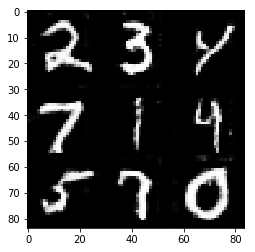

Discriminator Loss: 0.46740007400512695 
Generator Loss: 0.20205798745155334


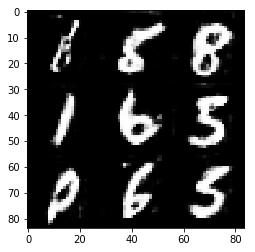

Discriminator Loss: 0.3959975838661194 
Generator Loss: 0.2131696492433548


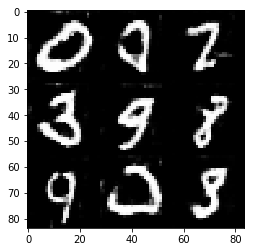

Discriminator Loss: 0.37402644753456116 
Generator Loss: 0.5066419243812561


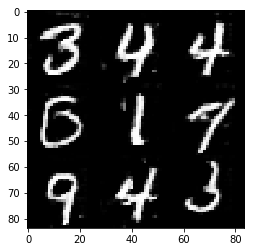

Discriminator Loss: 0.429036408662796 
Generator Loss: 0.17850841581821442


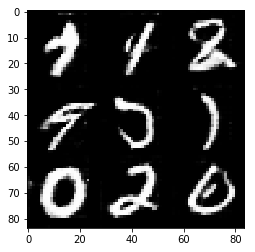

After Epoch 1
Discriminator Loss: 0.3591621220111847 
Generator Loss: 0.6317955851554871


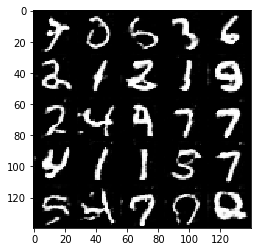

In [29]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
Discriminator Loss: 0.8048946261405945 
Generator Loss: 0.0024401757400482893


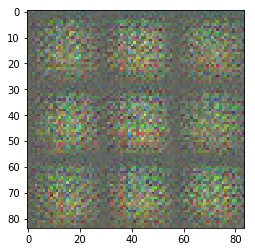

Discriminator Loss: 1.0912193059921265 
Generator Loss: 0.5238016843795776


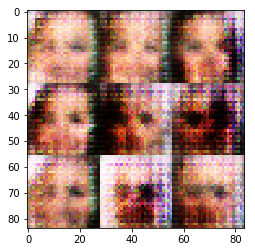

Discriminator Loss: 1.2225444316864014 
Generator Loss: 0.5868709683418274


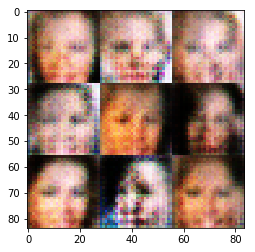

Discriminator Loss: 1.304747462272644 
Generator Loss: 0.6572003364562988


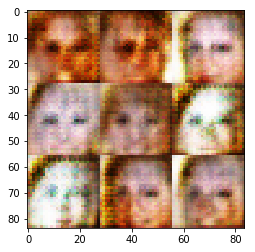

Discriminator Loss: 1.2967222929000854 
Generator Loss: 0.7021033763885498


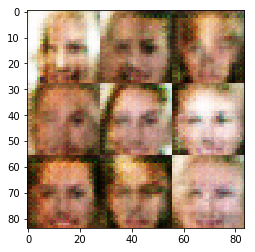

Discriminator Loss: 1.1815369129180908 
Generator Loss: 0.6155189275741577


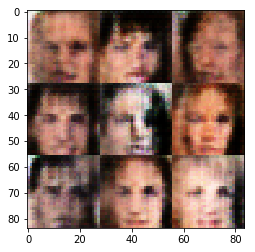

Discriminator Loss: 1.3673086166381836 
Generator Loss: 0.7238321900367737


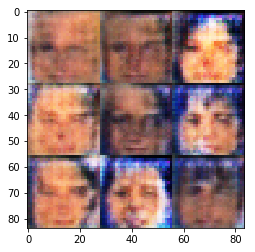

Discriminator Loss: 1.3294987678527832 
Generator Loss: 0.7444968223571777


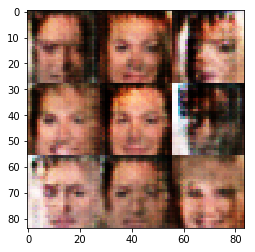

Discriminator Loss: 1.1992943286895752 
Generator Loss: 0.6632887721061707


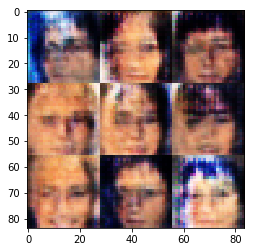

Discriminator Loss: 1.083350419998169 
Generator Loss: 0.7444124221801758


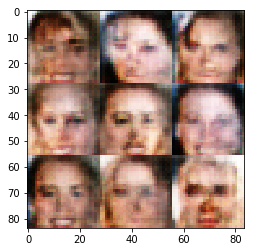

Discriminator Loss: 1.095621109008789 
Generator Loss: 0.6886076927185059


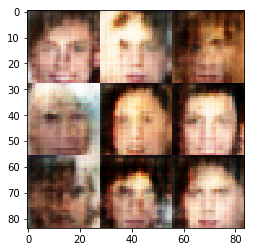

Discriminator Loss: 1.1426012516021729 
Generator Loss: 0.6650485396385193


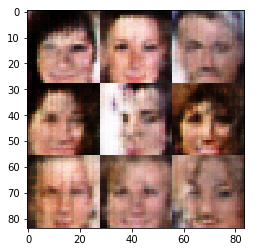

Discriminator Loss: 1.1285103559494019 
Generator Loss: 0.5841732621192932


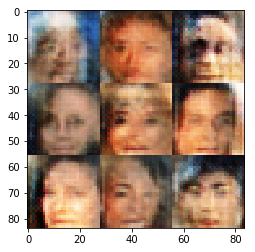

Discriminator Loss: 1.05240797996521 
Generator Loss: 0.5805208683013916


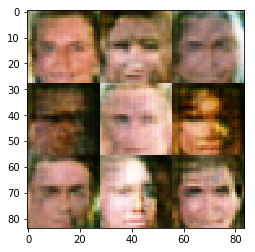

Discriminator Loss: 1.215754508972168 
Generator Loss: 0.5711389780044556


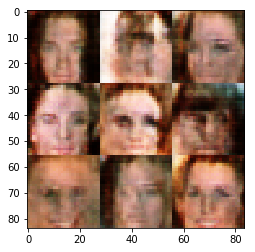

Discriminator Loss: 1.1373369693756104 
Generator Loss: 0.6598819494247437


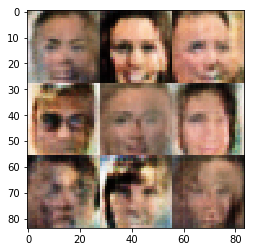

Discriminator Loss: 1.148084044456482 
Generator Loss: 0.5529005527496338


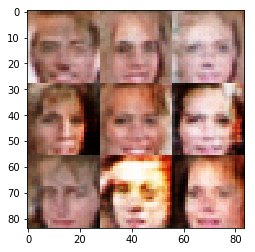

Discriminator Loss: 0.9322967529296875 
Generator Loss: 0.6278496980667114


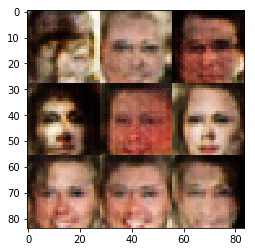

Discriminator Loss: 1.0858211517333984 
Generator Loss: 0.5784155130386353


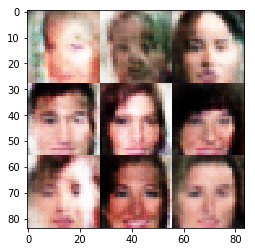

Discriminator Loss: 0.9151358604431152 
Generator Loss: 0.4852096140384674


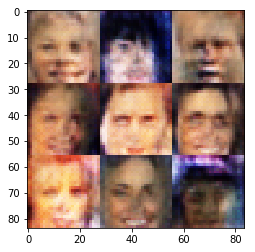

Discriminator Loss: 1.1055641174316406 
Generator Loss: 0.5613974928855896


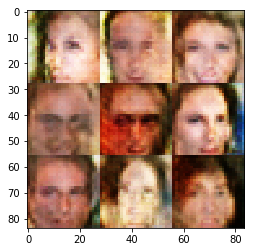

Discriminator Loss: 1.0526059865951538 
Generator Loss: 0.6481534242630005


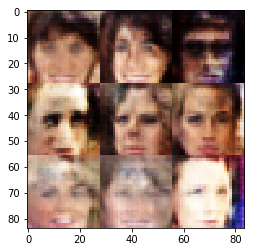

Discriminator Loss: 1.0845146179199219 
Generator Loss: 0.5626867413520813


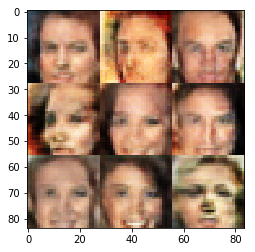

Discriminator Loss: 1.0272448062896729 
Generator Loss: 0.6031937599182129


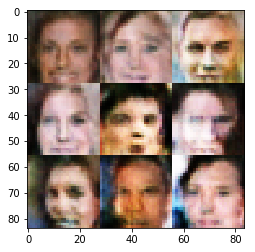

Discriminator Loss: 1.0661529302597046 
Generator Loss: 0.5383393168449402


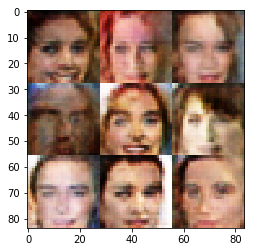

Discriminator Loss: 0.8567788600921631 
Generator Loss: 0.6473408937454224


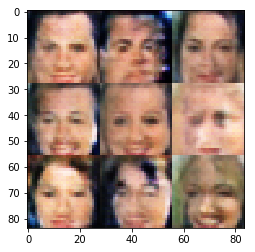

Discriminator Loss: 0.9931246042251587 
Generator Loss: 0.651753306388855


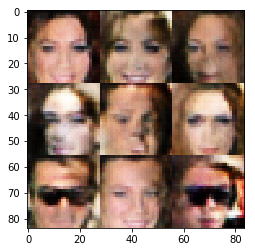

Discriminator Loss: 0.9485582113265991 
Generator Loss: 0.3865242302417755


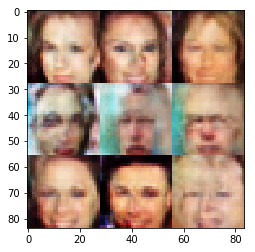

Discriminator Loss: 1.026680588722229 
Generator Loss: 0.7369558811187744


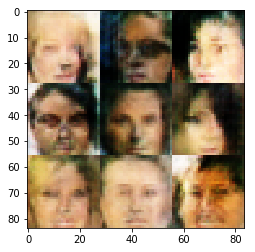

Discriminator Loss: 1.018470287322998 
Generator Loss: 0.46425536274909973


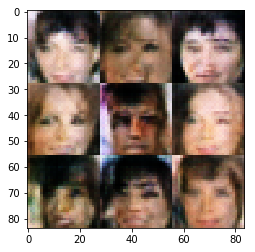

Discriminator Loss: 0.8284915089607239 
Generator Loss: 0.4518387019634247


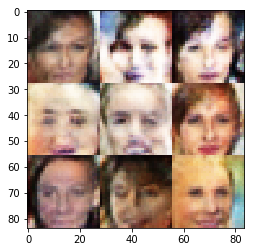

Discriminator Loss: 1.1070868968963623 
Generator Loss: 0.5094215273857117


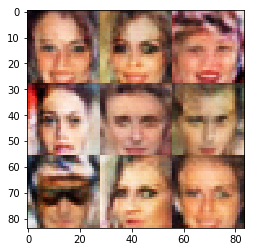

Discriminator Loss: 1.040164828300476 
Generator Loss: 0.5482786297798157


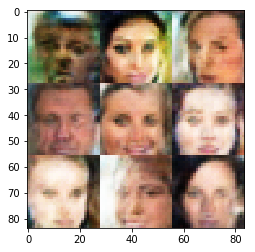

Discriminator Loss: 0.9084126949310303 
Generator Loss: 0.5815771818161011


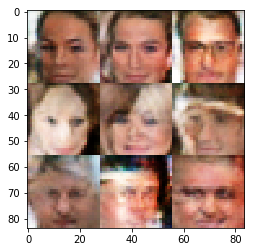

Discriminator Loss: 1.1570281982421875 
Generator Loss: 0.42982637882232666


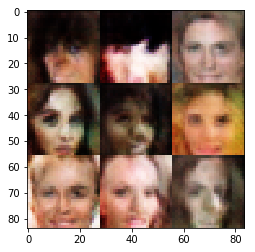

Discriminator Loss: 0.9640932083129883 
Generator Loss: 0.5004892349243164


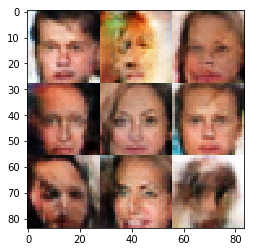

Discriminator Loss: 0.9599475264549255 
Generator Loss: 0.45941925048828125


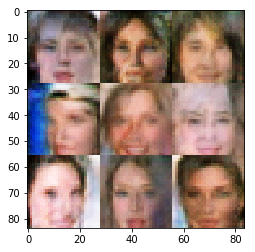

Discriminator Loss: 0.9586248993873596 
Generator Loss: 0.4920169711112976


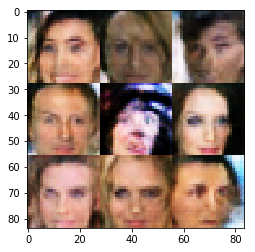

Discriminator Loss: 0.9838544130325317 
Generator Loss: 0.5784889459609985


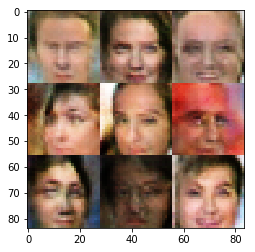

Discriminator Loss: 0.9031783938407898 
Generator Loss: 0.6080064177513123


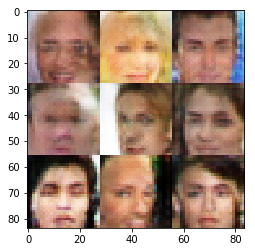

Discriminator Loss: 0.9595179557800293 
Generator Loss: 0.5576543807983398


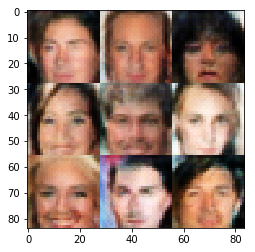

Discriminator Loss: 0.9518246650695801 
Generator Loss: 0.5603981018066406


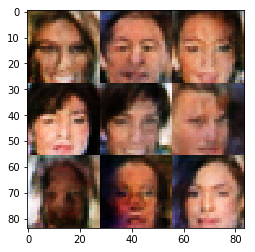

Discriminator Loss: 1.0903337001800537 
Generator Loss: 0.4425343871116638


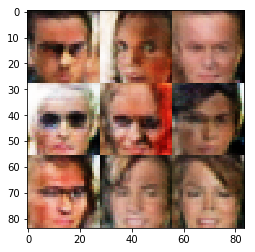

Discriminator Loss: 1.0486621856689453 
Generator Loss: 0.500852108001709


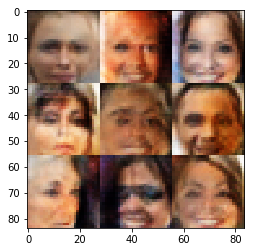

Discriminator Loss: 0.8263134956359863 
Generator Loss: 0.49639517068862915


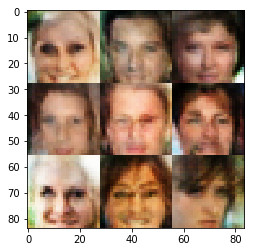

Discriminator Loss: 0.9763107299804688 
Generator Loss: 0.4500512182712555


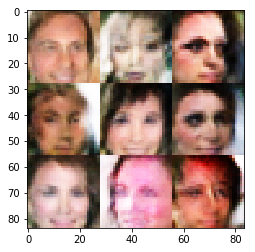

Discriminator Loss: 0.962553858757019 
Generator Loss: 0.503240704536438


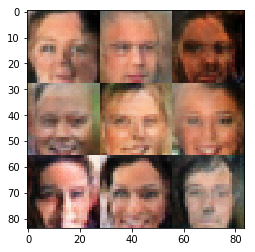

Discriminator Loss: 1.0344566106796265 
Generator Loss: 0.5784871578216553


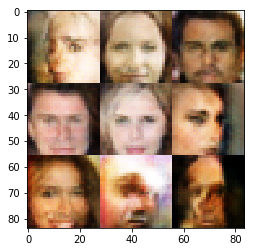

Discriminator Loss: 0.7090853452682495 
Generator Loss: 0.172734797000885


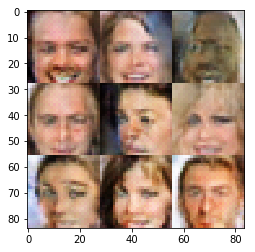

Discriminator Loss: 0.7511107921600342 
Generator Loss: 0.2826597988605499


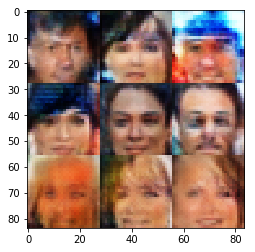

Discriminator Loss: 0.875999391078949 
Generator Loss: 0.5755960941314697


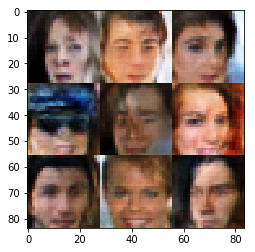

Discriminator Loss: 1.0348522663116455 
Generator Loss: 0.6204744577407837


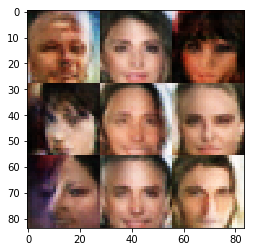

Discriminator Loss: 0.7696555256843567 
Generator Loss: 0.5058920383453369


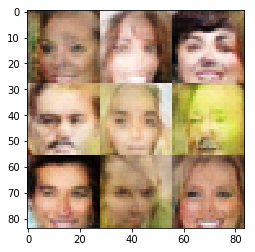

Discriminator Loss: 0.8782052993774414 
Generator Loss: 0.43510568141937256


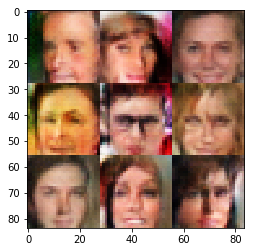

Discriminator Loss: 0.8300718069076538 
Generator Loss: 0.5560990571975708


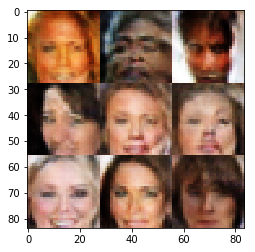

Discriminator Loss: 0.9738429188728333 
Generator Loss: 0.46199601888656616


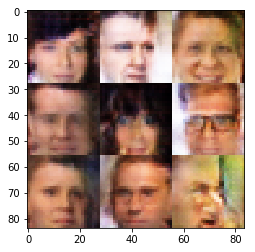

Discriminator Loss: 0.9128901958465576 
Generator Loss: 0.301889032125473


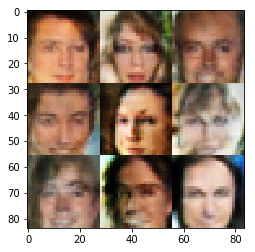

Discriminator Loss: 0.9817243814468384 
Generator Loss: 0.5211408734321594


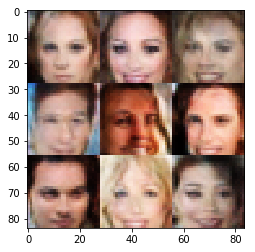

Discriminator Loss: 1.0686798095703125 
Generator Loss: 0.34224003553390503


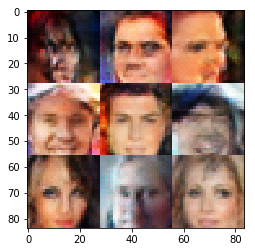

Discriminator Loss: 0.9676223993301392 
Generator Loss: 0.32370567321777344


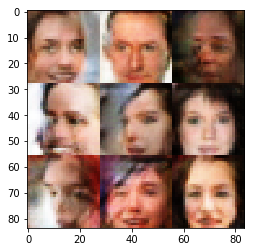

Discriminator Loss: 0.7544552087783813 
Generator Loss: 0.3557620644569397


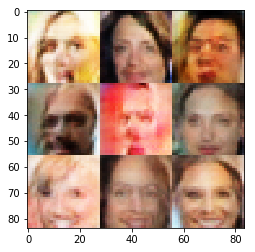

Discriminator Loss: 1.064513087272644 
Generator Loss: 0.5050691366195679


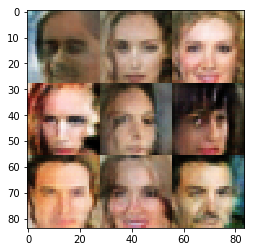

Discriminator Loss: 0.816016435623169 
Generator Loss: 0.44458556175231934


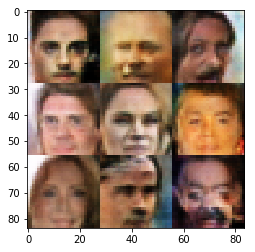

Discriminator Loss: 0.8908194303512573 
Generator Loss: 0.4550160765647888


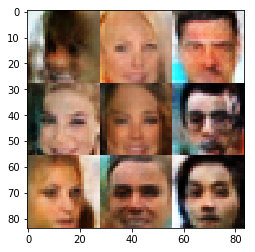

After Epoch 0
Discriminator Loss: 0.7920085787773132 
Generator Loss: 0.4823189675807953


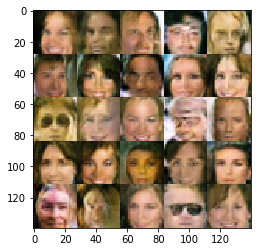

In [30]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.